## 动手实践：基于LLM构建中文场景的对话引擎

- 本课程旨在降低对话式人工智能和LLM大语言模型的使用门槛，通过理论与实践相结合，快速了解对话式人工智能的搭建流程。
- 通过上机体验动手实践，使用对话式人工智能开发工具，基于LLM大语言模型手把手构建一个中文场景下“能听、能想、能说”的智能聊天机器人。
- 本课程主要面向于对 NLP自然语音处理、对话式人工智能、LLM 大语言模型零基础感兴趣朋友们。
- 服务器硬件要求：
配备至少8G以上显存的GPU（建议16G显存的GPU）
配备至少20G以上的磁盘空间

- 通过本课程您可以了解以下信息：

    •	对话式人工智能介绍
    
    •	中文LLM大语言模型ChatGLM介绍
    
    •	代码实践：基于LLM快速构建中文场景的对话引擎




### 0.导入Nemo工具库及相关工具类

In [1]:
import nemo
import nemo.collections.asr as nemo_asr
import nemo.collections.tts as nemo_tts

2023-09-01 15:56:02.369656: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-01 15:56:03.354582: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-09-01 15:56:03.354706: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-09-01 15:56:03.354717: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

In [2]:
import librosa
import IPython.display as ipd

# Load and listen to the audio file
example_file = "/root/ms_chatbot/tianqi.wav"
audio, sample_rate = librosa.load(example_file)
ipd.Audio(example_file, rate=sample_rate)

###  1.构建机器的“耳朵”实现听写的过程

#### 加载语音识别模型

In [3]:
citrinet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_zh_citrinet_512")# 加载ASR语音识别预训练模型

[NeMo I 2023-09-01 15:56:08 cloud:58] Found existing object /root/.cache/torch/NeMo/NeMo_1.18.1/stt_zh_citrinet_512/cfe4cc823730475d065cd2ce4a3a9758/stt_zh_citrinet_512.nemo.
[NeMo I 2023-09-01 15:56:08 cloud:64] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.18.1/stt_zh_citrinet_512/cfe4cc823730475d065cd2ce4a3a9758/stt_zh_citrinet_512.nemo
[NeMo I 2023-09-01 15:56:08 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-09-01 15:56:19 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /home/jbalam/old_home/aishell_exp/models/manifest.train
    sample_rate: 16000
    batch_size: 32
    labels:
    - ' '
    - ''''
    - A
    - B
    - C
    - D
    - E
    - F
    - G
    - H
    - I
    - J
    - K
    - L
    - M
    - 'N'
    - O
    - P
    - Q
    - R
    - S
    - T
    - U
    - V
    - W
    - X
    - 'Y'
    - Z
    - 㶧
    - 䶮
    - 一
    - 丁
    - 七
    - 万
    - 丈
    - 三
    - 上
    - 下
    - 不
    - 与
    - 丐
    - 丑
    - 专
    - 且
    - 丕
    - 世
    - 丘
    - 丙
    - 业
    - 丛
    - 东
    - 丝
    - 丞
    - 丢
    - 两
    - 严
    - 丧
    - 个
    - 丫
    - 中
    - 丰
    - 串
    - 临
    - 丸
    - 丹
    - 为
    - 主
    - 丽
    - 举
    - 乃
    - 久
    - 么
    - 义
    - 之
    - 乌
    - 乍
    - 乎
    - 乏
    

[NeMo I 2023-09-01 15:56:19 features:287] PADDING: 16
[NeMo I 2023-09-01 15:56:24 save_restore_connector:249] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.18.1/stt_zh_citrinet_512/cfe4cc823730475d065cd2ce4a3a9758/stt_zh_citrinet_512.nemo.


#### 传入语音文件进行语音识别

In [4]:
asr_result = citrinet.transcribe(paths2audio_files=["tianqi.wav"])
asr_result = " ".join(asr_result)
print(asr_result)

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

今天天气如何


### 2.构建机器的“大脑” 实现聊天的过程

In [5]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("THUDM/chatglm2-6b", trust_remote_code=True)
model = AutoModel.from_pretrained("THUDM/chatglm2-6b", trust_remote_code=True).quantize(8).cuda()
model = model.eval()
response, history = model.chat(tokenizer, asr_result+"10个字以内", history=[])
print(response)

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

阳光明媚


### 3.构建机器的“嘴巴”将文字用声音说出来

In [6]:
from nemo.collections.tts.models import FastPitchModel
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

#### 加载fastpitch声学模型

In [7]:
spec_generator = FastPitchModel.from_pretrained(model_name="tts_zh_fastpitch_sfspeech")

[NeMo I 2023-09-01 15:56:55 cloud:58] Found existing object /root/.cache/torch/NeMo/NeMo_1.18.1/tts_zh_fastpitch_sfspeech/3bf748b7e338e6d009e0867e5a1b8a23/tts_zh_fastpitch_sfspeech.nemo.
[NeMo I 2023-09-01 15:56:55 cloud:64] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.18.1/tts_zh_fastpitch_sfspeech/3bf748b7e338e6d009e0867e5a1b8a23/tts_zh_fastpitch_sfspeech.nemo
[NeMo I 2023-09-01 15:56:55 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-09-01 15:56:56 fastpitch:209] This checkpoint support will be dropped after r1.18.0.
[NeMo W 2023-09-01 15:56:56 experimental:27] Module <class 'nemo.collections.tts.g2p.models.i18n_ipa.IpaG2p'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2023-09-01 15:56:56 zh_cn_pinyin:57] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2023-09-01 15:56:56 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /manifest/train_manifest.json
      sample_rate: 22050
  

[NeMo I 2023-09-01 15:56:56 features:287] PADDING: 1
[NeMo I 2023-09-01 15:56:57 save_restore_connector:249] Model FastPitchModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.18.1/tts_zh_fastpitch_sfspeech/3bf748b7e338e6d009e0867e5a1b8a23/tts_zh_fastpitch_sfspeech.nemo.


In [8]:
response

'阳光明媚'

#### 通过Fastpitch声学模型将文字转换成对应频谱图

[NeMo W 2023-09-01 15:56:57 fastpitch:268] parse() is meant to be called in eval mode.
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.802 seconds.
Prefix dict has been built successfully.
[NeMo W 2023-09-01 15:56:58 fastpitch:333] generate_spectrogram() is meant to be called in eval mode.


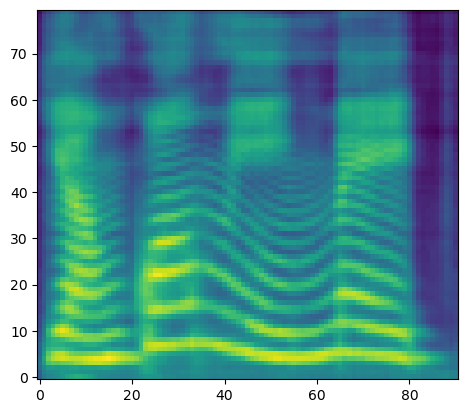

In [9]:
parsed = spec_generator.parse(response)
spectrogram = spec_generator.generate_spectrogram(tokens=parsed)#调用模型的generate_spectrogram函数生成频谱图
imshow(spectrogram.cpu().detach().numpy()[0,...], origin="lower")#将Tensor转换为numpy array进行可视化
plt.show() #matplotlib展示文字对应的频谱图

#### 加载HiFigan声码器模型

In [10]:
from nemo.collections.tts.models import HifiGanModel
Hifigan = HifiGanModel.restore_from("tts_hifigan.nemo")

[NeMo W 2023-09-01 15:57:01 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2023-09-01 15:57:01 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2023-09-01 15:57:01 features:287] PADDING: 0


[NeMo W 2023-09-01 15:57:01 features:264] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2023-09-01 15:57:01 features:287] PADDING: 0
[NeMo I 2023-09-01 15:57:02 save_restore_connector:249] Model HifiGanModel was successfully restored from /root/ms_chatbot/tts_hifigan.nemo.


#### 使用HiFigan声码器将频谱图合成出语音

In [11]:
import IPython
audio = Hifigan.convert_spectrogram_to_audio(spec=spectrogram) #调用模型convert_spectrogram_to_audio()函数进行频谱到音频文件的转换
IPython.display.Audio(audio.to('cpu').detach().numpy(), rate=22050)

---